In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

In [3]:
df=pd.read_csv('/content/quikr_car.csv')
df


,Name of car,Company name,Year,Price,Kms driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of car   892 non-null    object
 1   Company name  892 non-null    object
 2   Year          892 non-null    object
 3   Price         892 non-null    object
 4   Kms driven    840 non-null    object
 5   Fuel_type     837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df.value_counts()

Name of car                          Company name  Year  Price      Kms driven  Fuel_type
Mahindra Scorpio S10                 Mahindra      2015  9,00,000   97,200      Diesel       5
Honda Amaze                          Honda         2015  3,44,999   22,000      Petrol       4
Mini Cooper S 1.6                    Mini          2013  18,91,111  13,000      Petrol       4
Honda Amaze                          Honda         2013  2,84,999   46,000      Diesel       4
Force Motors Force One LX ABS 7 STR  Force         2015  5,80,000   3,200       Diesel       3
                                                                                            ..
Hyundai i10 Sportz 1.2               Hyundai       2010  1,68,000   45,872      Petrol       1
                                                   2011  2,20,000   38,000      Petrol       1
Hyundai i20                          Hyundai       2009  1,99,000   31,000      Petrol       1
                                                   2014

In [6]:
df.isna().sum()

Name of car      0
Company name     0
Year             0
Price            0
Kms driven      52
Fuel_type       55
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.sample(20)

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
336,Renault Duster 110 PS RxZ Diesel Plus,Renault,2012,"5,01,000","38,000",Diesel
699,Mahindra Scorpio SLX,Mahindra,2004,"1,75,000","60,000",Diesel
816,Hyundai Creta,Hyundai,2016,"9,00,000","60,000",Diesel
828,Maruti Suzuki Swift Select Variant,Maruti,2008,"1,62,000","60,000",Diesel
426,Maruti Suzuki Swift Dzire Tour LDi,Maruti,2015,"2,20,000","1,29,000",Diesel
459,Honda City SV,Honda,2017,"7,60,000","4,000",Petrol
538,Audi A6 2.0 TDI Premium,Audi,2012,"15,99,000","11,500",Diesel
410,Honda Jazz S MT,Honda,2009,"1,69,999","24,695",Petrol
451,Ford Figo Duratorq Diesel Titanium 1.4,Ford,2012,"2,50,000","99,000",Diesel
273,Renault Duster 85 PS RxL Diesel,Renault,2015,"5,49,999","19,000",Diesel


# Data analysing steps

In [9]:
df=df[df['Year'].str.isnumeric()]

df['Year']=df['Year'].astype(int)

In [10]:
df=df[df['Price']!='Ask For Price']

df['Price']=df['Price'].str.replace(',','').astype(int)

In [11]:
df['Kms driven']=df['Kms driven'].str.split(' ').str.get(0).replace(',','')
df=df[df['Kms driven'].str.isnumeric()]
df['Kms driven']=df['Kms driven'].astype(int)

In [12]:
df.sample(15)

,Name of car,Company name,Year,Price,Kms driven,Fuel_type
387,Toyota Innova 2.5 E MS 7 STR BS IV,Toyota,2012,770000,0,Diesel
470,Maruti Suzuki Swift Dzire Tour VXi,Maruti,2011,230000,65,Petrol
762,Tata Tiago Revotorq XZ,Tata,2019,568500,0,Petrol
485,Tata Tigor Revotron XZ,Tata,2019,650000,100,Diesel
364,Mahindra Jeep MM 550 XDB,Mahindra,2019,390000,60,Diesel
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
427,Nissan X Trail Select Variant,Nissan,2019,1200000,300,Diesel
382,Mahindra Jeep MM 550 XDB,Mahindra,2006,425000,122,Diesel
577,Mahindra Jeep MM 550 XDB,Mahindra,2004,424000,383,Diesel
381,Mahindra Jeep CL550 MDI,Mahindra,2018,385000,588,Diesel


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 762
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of car   17 non-null     object
 1   Company name  17 non-null     object
 2   Year          17 non-null     int64 
 3   Price         17 non-null     int64 
 4   Kms driven    17 non-null     int64 
 5   Fuel_type     17 non-null     object
dtypes: int64(3), object(3)
memory usage: 952.0+ bytes


In [14]:
df.describe()

,Year,Price,Kms driven
count,17.000000,1.700000e+01,17.000000
mean,2014.235294,5.369118e+05,142.294118
std,5.921670,2.911702e+05,198.243148
min,2004.000000,1.250000e+05,0.000000
25%,2009.000000,3.900000e+05,0.000000
50%,2018.000000,4.250000e+05,60.000000
75%,2019.000000,6.100000e+05,122.000000
max,2019.000000,1.200000e+06,588.000000


In [15]:
df['Price']

1       425000
15      425000
215     390000
222     385000
302     610000
364     390000
381     385000
382     425000
387     770000
427    1200000
470     230000
485     650000
577     424000
702     525000
721     125000
738    1200000
762     568500
Name: Price, dtype: int64

<Figure size 1152x432 with 0 Axes>

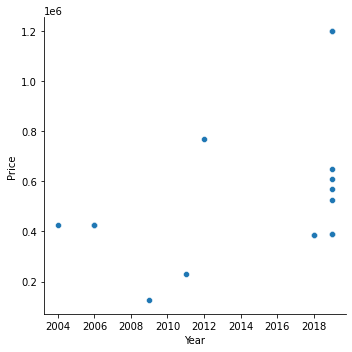

In [16]:
plt.figure(figsize=(16,6))
sns.relplot(x='Year',y='Price',data=df,height=5)
plt.show()

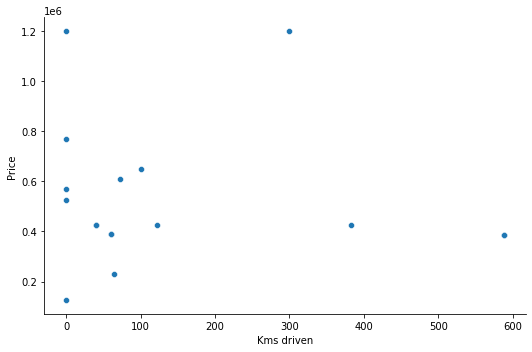

In [17]:
sns.relplot(x='Kms driven',y='Price',data=df,height=5,aspect=1.5)

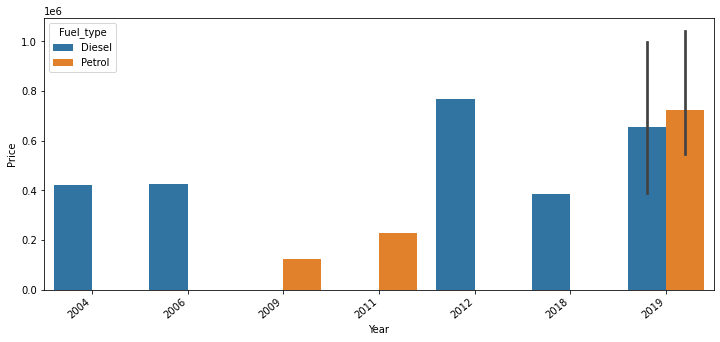

In [18]:
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Year',y='Price',data=df,hue='Fuel_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# ML

In [31]:
X=df[['Year','Kms driven','Fuel_type']]
y=df['Price']

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Fuel_type']=encoder.fit_transform(df['Fuel_type'].values)

In [29]:
df['Fuel_type']

1      0
15     0
215    0
222    0
302    1
364    0
381    0
382    0
387    0
427    0
470    1
485    0
577    0
702    1
721    1
738    1
762    1
Name: Fuel_type, dtype: int64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [30]:
from sklearn import linear_model
MLR_model=linear_model.LinearRegression()
x_train=np.asanyarray(df[['Year','Kms driven','Fuel_type']])
y_train=np.asanyarray(df['Price'])
MLR_model.fit(x_train,y_train)

print(MLR_model.coef_)
print(MLR_model.intercept_)

[  22826.98315412    -276.82994094 -103754.90438106]
-45365992.71235171


In [23]:
liner_regr_model=LinearRegression()
liner_regr_model.fit(x_train,y_train)
theta0=liner_regr_model.coef_[0]
theta1=liner_regr_model.intercept_
print (f'{theta1=}')
print (f'{theta0=}')

theta1=-45365992.71235171
theta0=22826.98315412094


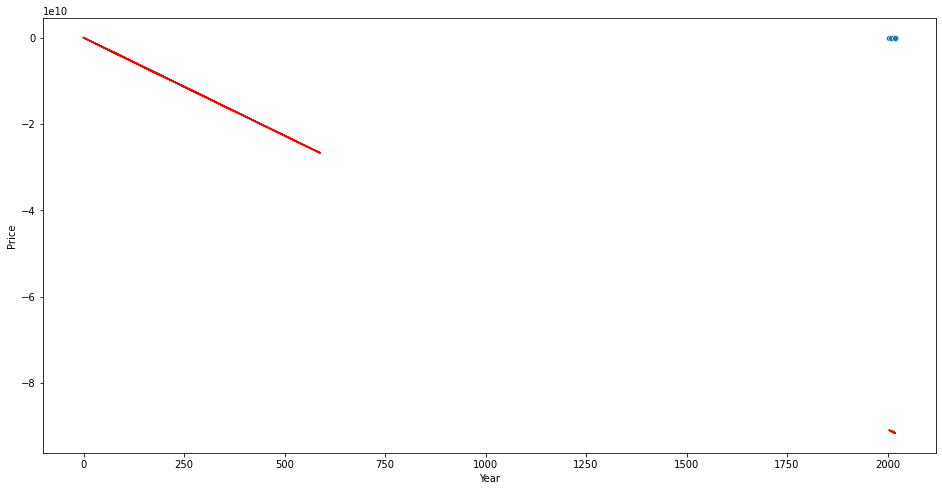

In [26]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df,x='Year',y='Price')
plt.plot(x_train,theta1*x_train+theta0,'-r')
plt.show()

In [35]:
y_predict=MLR_model.predict(x_test)
y_predict

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([705076.47936182, 561897.39373962, 638637.29353523, 617931.37143741])

In [37]:
y_predict[0].np.asa

705076.4793618172

Errors

In [47]:
MASE=mean_absolute_error(y_predict,y_test)
MSE=mean_squared_error(y_predict,y_test)
print(f'{MASE=}')
print(f'{MSE=}')

MASE=416652.60516239144
MSE=199127964786.39868
